**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 8**
Regresión Lineal

---

**EQUIPO 34**

NOMBRE: Maria Fernanda Ocampo Nava / MATRÍCULA: A01797420

NOMBRE: Arturo Alejandro Flores Amaro / MATRÍCULA: A01797429

NOMBRE: Joel Arturo Becerril Balderas / MATRÍCULA: A01797427

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
DIR = "/content/drive/MyDrive/maestria/IA/Tec/Ciencia_de_datos/Semana8_2al8jun/Actividad_Semana8"
os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **Parte 1**. EDA

Efectúa una exploración inicial de los datos a través de:

1a) Estadísticas descriptivas para todas las variables del dataframe.

In [5]:
insurance_df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [6]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


1b) Búsqueda de valores faltantes.

In [7]:
insurance_df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


1c) Histrogramas y boxplots para las variables cuantitativas y diagramas de barras con la frecuencia para las variables categóricas.

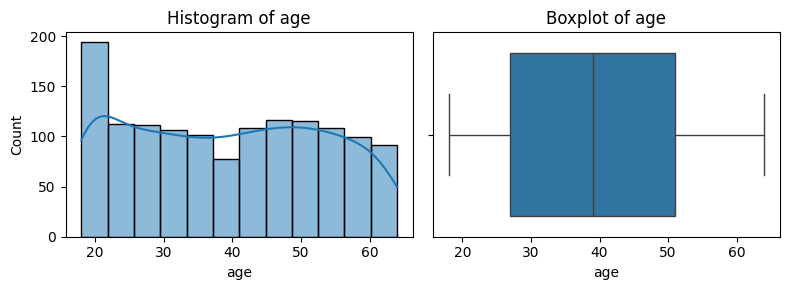

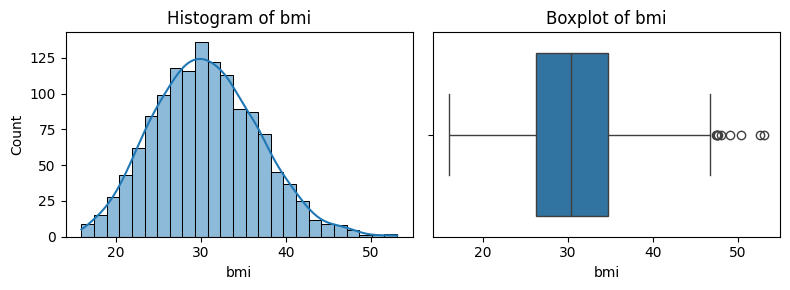

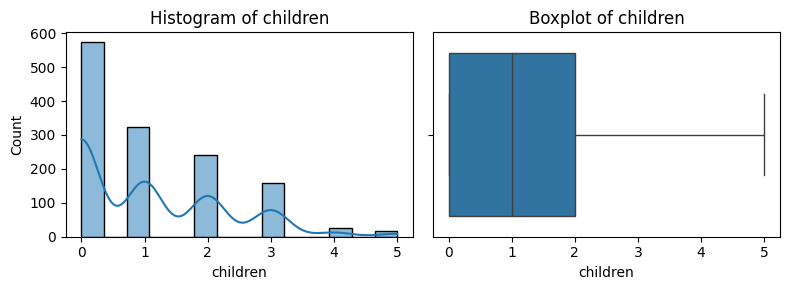

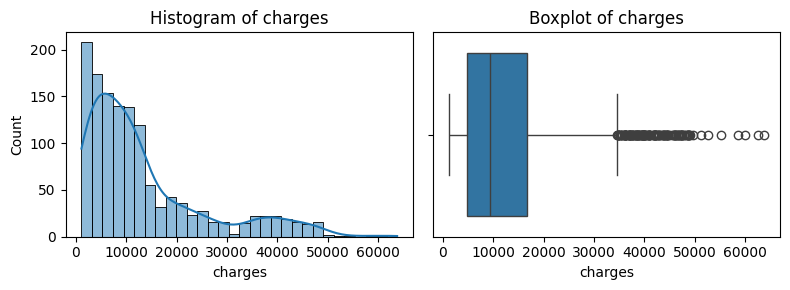

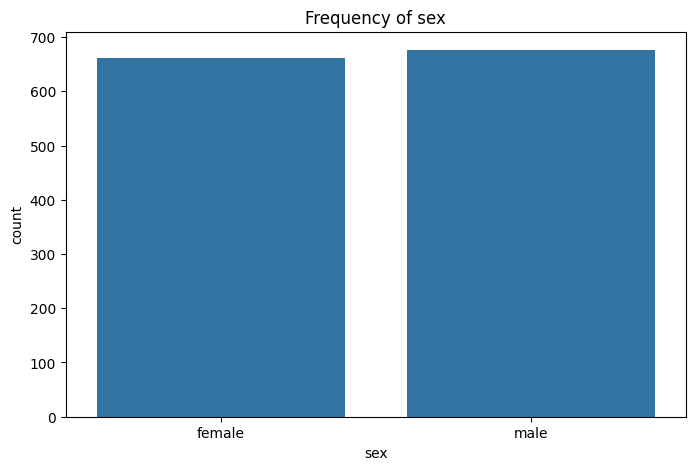

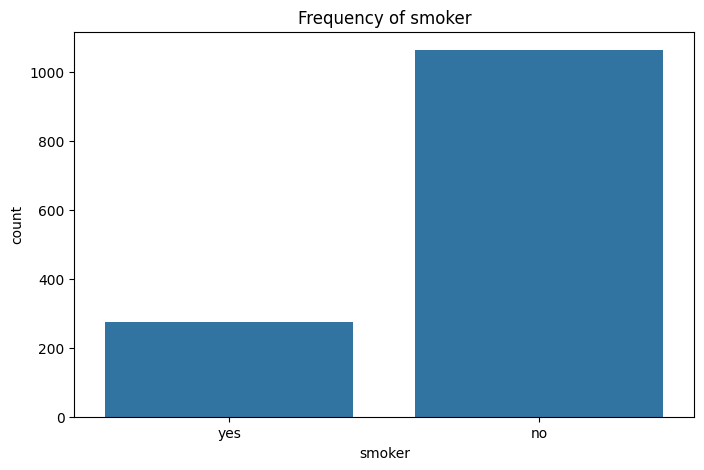

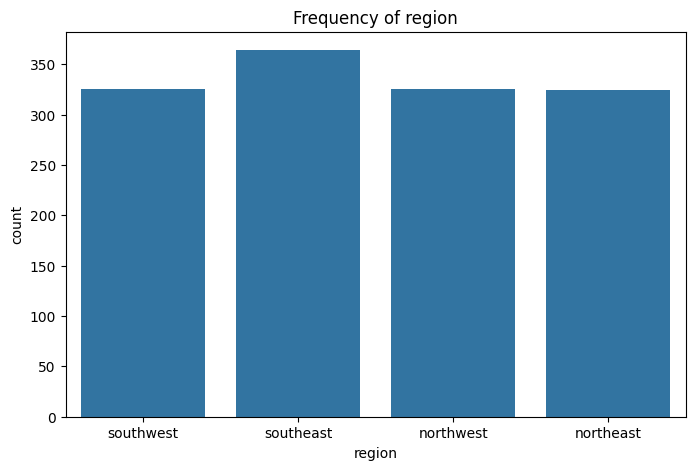

In [9]:
# Select quantitative and qualitative features
quantitative_features = ['age', 'bmi', 'children', 'charges']
qualitative_features = ['sex', 'smoker', 'region']

# Plot histograms and boxplots for quantitative features
for feature in quantitative_features:
    plt.figure(figsize=(8, 3))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data=insurance_df, x=feature, kde=True)
    plt.title(f'Histogram of {feature}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=insurance_df, x=feature)
    plt.title(f'Boxplot of {feature}')

    plt.tight_layout()
    plt.show()

# Plot bar plots for qualitative features
for feature in qualitative_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=insurance_df, x=feature)
    plt.title(f'Frequency of {feature}')
    plt.show()

Para responder los siguientes cuestionamientos, genera los gráficos indicados:

2a) ¿Hay diferencias significativas de las primas según el sexo? Compara la distribución de la variable `charges` por medio de un boxplot.

**RESPUESTA SÍ HAY DIFERENCIA SIGNIFICATIVA**

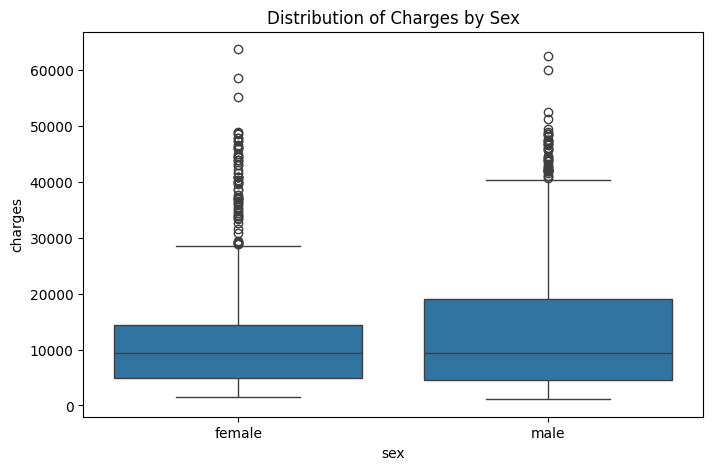

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=insurance_df, x='sex', y='charges')
plt.title('Distribution of Charges by Sex')
plt.show()

In [12]:
#CALCULO ESTADISTICO DE DIFERENCIA SIGNIFICATIVA
from scipy import stats

# Separate charges by sex
charges_male = insurance_df[insurance_df['sex'] == 'male']['charges']
charges_female = insurance_df[insurance_df['sex'] == 'female']['charges']

# Perform independent t-test
ttest_result = stats.ttest_ind(charges_male, charges_female)

# Print the result
print(f"T-statistic: {ttest_result.statistic}")
print(f"P-value: {ttest_result.pvalue}")

# Interpret the result based on the p-value
alpha = 0.05
if ttest_result.pvalue < alpha:
    print("SÍ HAY DIFERENCIA SIGNIFICATIVA.")
else:
    print("NO HAY DIFERECIA SIGNIFICACTIVA.")

T-statistic: 2.097546590051688
P-value: 0.03613272100592976
SÍ HAY DIFERENCIA SIGNIFICATIVA.


2b) Crea un diagrama de dispersión de `charges` versus el `bmi` que incorpore la distinción por las categorías `smoker` y `children` (tip: utiliza el parámetro `size`) ¿Hay alguna conclusión importante que se derive del gráfico?

**RESPUESTA**

Conclusión basada en la gráfica:
* La gráfica de dispersión muestra claramente una diferencia significativa en los costos entre fumadores y no fumadores.
* Los fumadores tienen costos considerablemente más altos, independientemente de su IMC o el número de hijos que tengan.
* Entre los no fumadores, parece haber una ligera correlación positiva entre el IMC y los costos, pero la variación es mucho menor en comparación con los fumadores.
* La variable 'hijos', representada por el tamaño de los marcadores, parece tener un impacto menor en los costos en comparación con la variable 'fumador'.
* Los fumadores con un mayor número de hijos podrían tener costos ligeramente más altos dentro del grupo de fumadores, pero el principal impulsor de los altos costos es ser fumador.



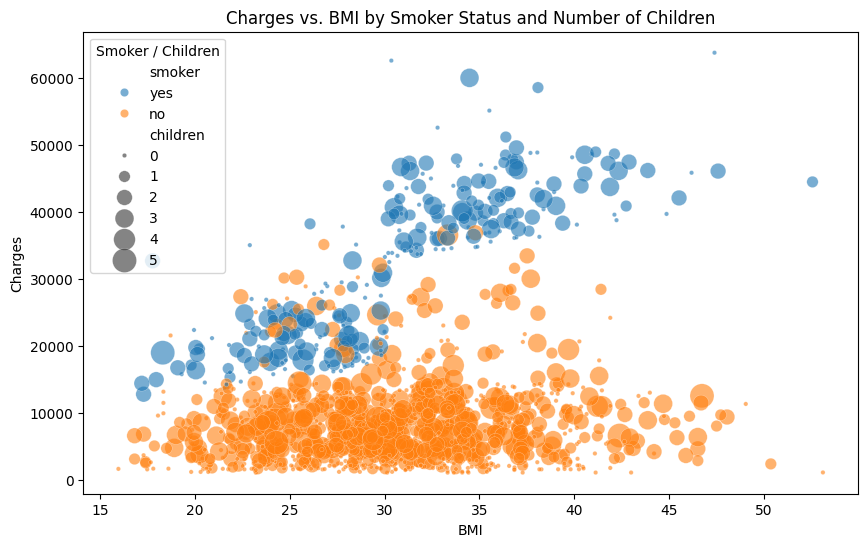

In [14]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=insurance_df, x='bmi', y='charges', hue='smoker', size='children', sizes=(10, 300), alpha=0.6)
plt.title('Charges vs. BMI by Smoker Status and Number of Children')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Smoker / Children')
plt.show()

2c) Elabora un mapa de calor que muestre la correlación de las variables numéricas.

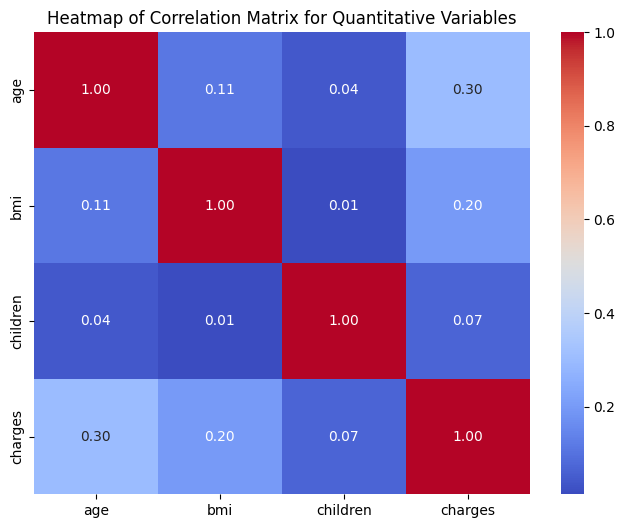

In [15]:
# Calculate the correlation matrix for quantitative features
correlation_matrix = insurance_df[quantitative_features].corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix for Quantitative Variables')
plt.show()

Obtén un dataframe con las observaciones que tengan valores atípicos en `charges`.

3a) ¿Cuál es el promedio de `age` y de `bmi` en el dataframe de valores atípicos obtenido?

**RESPUESTA**
Average age in the outlier dataframe: 41.08

Average BMI in the outlier dataframe: 35.56


In [16]:

# Calculate the first and third quartiles for 'charges'
Q1 = insurance_df['charges'].quantile(0.25)
Q3 = insurance_df['charges'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataframe to get observations with outliers in 'charges'
outlier_df = insurance_df[(insurance_df['charges'] < lower_bound) | (insurance_df['charges'] > upper_bound)]

# Print the outlier dataframe
print("DataFrame with outliers in 'charges':")
print(outlier_df)

# 3a) Calculate the average age and bmi in the outlier dataframe
average_age_outliers = outlier_df['age'].mean()
average_bmi_outliers = outlier_df['bmi'].mean()

print(f"\nAverage age in the outlier dataframe: {average_age_outliers:.2f}")
print(f"Average BMI in the outlier dataframe: {average_bmi_outliers:.2f}")

DataFrame with outliers in 'charges':
      age     sex     bmi  children smoker     region      charges
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
29     31    male  36.300         2    yes  southwest  38711.00000
30     22    male  35.600         0    yes  southwest  35585.57600
...   ...     ...     ...       ...    ...        ...          ...
1300   45    male  30.360         0    yes  southeast  62592.87309
1301   62    male  30.875         3    yes  northwest  46718.16325
1303   43    male  27.800         0    yes  southwest  37829.72420
1313   19  female  34.700         2    yes  southwest  36397.57600
1323   42  female  40.370         2    yes  southeast  43896.37630

[139 rows x 7 columns]

Average age in the outlier dataframe: 41.08
Average BMI in the outlier dataframe: 35.56


3b) ¿Qué porcentaje de estas observaciones (en el dataframe de valores atípicos obtenidos) se corresponden a mujeres y a hombres? ¿A fumadores y no fumadores?

**RESPUESTA**

male      64.028777

female    35.971223

smoker
yes	97.841727


In [18]:
# 3b) Calculate the percentage of sex and smoker status in the outlier dataframe

# Percentage of sex
sex_counts = outlier_df['sex'].value_counts()
sex_percentage = sex_counts / len(outlier_df) * 100

print("\nPercentage of sex in the outlier dataframe:")
print(sex_percentage)

# Percentage of smoker status
smoker_counts = outlier_df['smoker'].value_counts()
smoker_percentage = smoker_counts / len(outlier_df) * 100

print("\nPercentage of smoker status in the outlier dataframe:")
smoker_percentage


Percentage of sex in the outlier dataframe:
sex
male      64.028777
female    35.971223
Name: count, dtype: float64

Percentage of smoker status in the outlier dataframe:


,count
smoker,
yes,97.841727
no,2.158273


# **Parte 2**. Preprocesamiento

4. Separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`charges`).




In [19]:
X = insurance_df.drop('charges', axis=1)
y = insurance_df['charges']

5. Divide el conjunto en entrenamiento y prueba (80:20) considerando:


*   El parámetro `random_state` con el valor de 1 para garantizar reproducibilidad.
*   Analiza los diagramas de barras obtenidos en el ejercicio 1c. Con los resultados observados, es conveniente usar la variable `smoker` en la estrategia de estratificación.
*   Como ya tienes separadas en `X` e `y` los predictores y salida, consulta cómo ejecutar la función `train_test_split()` para obtener `Xtrain, Xtest, ytrain, ytest` en una única instrucción.

In [21]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1, stratify=X['smoker'])


print("Xtrain shape:", Xtrain.shape)
print("Xtest shape:", Xtest.shape)
print("ytrain shape:", ytrain.shape)
print("ytest shape:", ytest.shape)

Xtrain shape: (1070, 6)
Xtest shape: (268, 6)
ytrain shape: (1070,)
ytest shape: (268,)


6. Prepara un transformador, denominado `preprocessing`, para aplicar escalamiento *MinMax* a los predictores numéricos y codificación *one-hot* a los categóricas.

In [22]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Identify numerical and categorical features
numerical_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

# Create the preprocessing ColumnTransformer
preprocessing = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Keep other columns (if any) - none in this case
)

# **Parte 3**. Entrenando y evaluando el modelo de RL

7. Ejecuta un pipeline con el transformador creado y el algoritmo de regresión lineal para entrenar un modelo denominado `lr_model`.

Evalúa el modelo en el conjunto de prueba y obtén la raíz del error cuadrático medio (`RMSE`) y la métrica `R` cuadrado ($R^2$). Aunque ésta última la estudiarás a detalle la próxima semana, ahora sólo debes saber que toma valores entre 0 y 1, donde 1 indica un ajuste perfecto y, por tanto, un modelo muy fiable para las previsiones futuras. La función de scikit-learn que determina esta métrica es: [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [23]:

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create the pipeline
lr_model = Pipeline(steps=[('preprocessor', preprocessing),
                           ('regressor', LinearRegression())])

# Train the model
lr_model.fit(Xtrain, ytrain)

# Make predictions on the test set
y_pred = lr_model.predict(Xtest)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(ytest, y_pred))
r2 = r2_score(ytest, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Root Mean Squared Error (RMSE): 5698.76
R-squared (R2): 0.75


**Valora el rendimiento del modelo con los siguientes cambios:**


8. Reemplaza los outliers de `charges` con el límite superior (`Q3 + 1.5 * IQR`) que obtuviste en la pregunta 3a. Haz el cambio en ambos conjuntos: `ytrain` y `ytest`, previo a la aplicación del mismo pipeline. Guarda el modelo como `lr_model2`.


In [ ]:
# Identify the upper bound for outliers in charges
Q1 = insurance_df['charges'].quantile(0.25)
Q3 = insurance_df['charges'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Replace outliers in ytrain and ytest with the upper bound
ytrain_cleaned = ytrain.copy()
ytest_cleaned = ytest.copy()

ytrain_cleaned[ytrain_cleaned > upper_bound] = upper_bound
ytest_cleaned[ytest_cleaned > upper_bound] = upper_bound

# Create the pipeline with the cleaned target variable
lr_model2 = Pipeline(steps=[('preprocessor', preprocessing),
                            ('regressor', LinearRegression())])

# Train the model using the cleaned ytrain
lr_model2.fit(Xtrain, ytrain_cleaned)

# Make predictions on the test set (using the original Xtest)
y_pred2 = lr_model2.predict(Xtest)

# Evaluate the model using the cleaned ytest
rmse2 = np.sqrt(mean_squared_error(ytest_cleaned, y_pred2))
r2_2 = r2_score(ytest_cleaned, y_pred2)

print(f"Root Mean Squared Error (RMSE) with outliers replaced: {rmse2:.2f}")
print(f"R-squared (R2) with outliers replaced: {r2_2:.2f}")

9. Prepara otro transformador, denominado `preprocessing2`, para aplicar escalamiento estándar a los predictores numéricos y codificación ordinal a los categóricas. Aplícalo en un nuevo pipeline utilizando nuevamente regresión lineal. Guarda el modelo como `lr_model3`.

**Nota.** Los cambios se ejecutan de manera consecutiva, por ejemplo: el reemplazo de los outliers también se ejecuta previo al transformador `preprocessing2` y así sucesivamente.

In [26]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd # Import pandas if it's not imported earlier in this script

# Identify the upper bound for outliers in charges
# Assumes 'insurance_df' is available from previous steps
Q1 = insurance_df['charges'].quantile(0.25)
Q3 = insurance_df['charges'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Replace outliers in ytrain and ytest with the upper bound
# Assumes 'ytrain' and 'ytest' are available from the train_test_split step
ytrain_cleaned = ytrain.copy()
ytest_cleaned = ytest.copy()

ytrain_cleaned[ytrain_cleaned > upper_bound] = upper_bound
ytest_cleaned[ytest_cleaned > upper_bound] = upper_bound

# Identify numerical and categorical features (same as before)
numerical_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

# Create the new preprocessing transformer
preprocessing2 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        # Changed handle_unknown='ignore' to handle_unknown='use_encoded_value'
        # and added unknown_value=-1 as required by OrdinalEncoder in newer versions
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_features)
    ],
    remainder='passthrough' # Keep other columns (if any)
)

# Create the pipeline with the new transformer and Linear Regression
lr_model3 = Pipeline(steps=[('preprocessor', preprocessing2),
                            ('regressor', LinearRegression())])

# Train the model using the cleaned ytrain
lr_model3.fit(Xtrain, ytrain_cleaned)

# Make predictions on the test set (using the original Xtest)
y_pred3 = lr_model3.predict(Xtest)

# Evaluate the model using the cleaned ytest
rmse3 = np.sqrt(mean_squared_error(ytest_cleaned, y_pred3))
r2_3 = r2_score(ytest_cleaned, y_pred3)

print(f"Root Mean Squared Error (RMSE) with StandardScaler and OrdinalEncoder: {rmse3:.2f}")
print(f"R-squared (R2) with StandardScaler and OrdinalEncoder: {r2_3:.2f}")

Root Mean Squared Error (RMSE) with StandardScaler and OrdinalEncoder: 4811.60
R-squared (R2) with StandardScaler and OrdinalEncoder: 0.76


10. Utiliza regresión polinomial para verificar si se produce un mejor ajuste. Intenta con varios grados, aunque debes dejar en el código sólo el de mejor rendimiento. Guarda el modelo como `lr_model4`.

In [27]:

from sklearn.preprocessing import PolynomialFeatures

# Identify the upper bound for outliers in charges
# Assumes 'insurance_df' is available from previous steps
Q1 = insurance_df['charges'].quantile(0.25)
Q3 = insurance_df['charges'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Replace outliers in ytrain and ytest with the upper bound
# Assumes 'ytrain' and 'ytest' are available from the train_test_split step
ytrain_cleaned = ytrain.copy()
ytest_cleaned = ytest.copy()

ytrain_cleaned[ytrain_cleaned > upper_bound] = upper_bound
ytest_cleaned[ytest_cleaned > upper_bound] = upper_bound

# Identify numerical and categorical features
numerical_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

# Create the preprocessing transformer (using StandardScaler and OrdinalEncoder based on lr_model3)
# We will add PolynomialFeatures after preprocessing
preprocessing_poly = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_features)
    ],
    remainder='passthrough'
)

# Define a range of degrees to try for polynomial regression
degrees_to_try = [2, 3, 4] # You can adjust this range

best_degree = 1 # Start with degree 1 (linear) as a baseline
best_rmse = float('inf')
best_r2 = -float('inf')
best_model = None

# Evaluate linear regression first (degree 1)
lr_model_linear = Pipeline(steps=[('preprocessor', preprocessing_poly),
                                   ('regressor', LinearRegression())])
lr_model_linear.fit(Xtrain, ytrain_cleaned)
y_pred_linear = lr_model_linear.predict(Xtest)
rmse_linear = np.sqrt(mean_squared_error(ytest_cleaned, y_pred_linear))
r2_linear = r2_score(ytest_cleaned, y_pred_linear)

print(f"Degree 1 (Linear) - RMSE: {rmse_linear:.2f}, R2: {r2_linear:.2f}")

best_degree = 1
best_rmse = rmse_linear
best_r2 = r2_linear
best_model = lr_model_linear
lr_model4 = best_model # Assign initial best model to lr_model4

# Iterate through different polynomial degrees
for degree in degrees_to_try:
    print(f"\nTrying Polynomial Degree: {degree}")
    # Create the pipeline with polynomial features
    poly_model = Pipeline(steps=[('preprocessor', preprocessing_poly),
                                 ('polynomial', PolynomialFeatures(degree=degree, include_bias=False)), # include_bias=False to avoid multicollinearity with the intercept
                                 ('regressor', LinearRegression())])

    # Train the model
    poly_model.fit(Xtrain, ytrain_cleaned)

    # Make predictions
    y_pred_poly = poly_model.predict(Xtest)

    # Evaluate the model
    rmse_poly = np.sqrt(mean_squared_error(ytest_cleaned, y_pred_poly))
    r2_poly = r2_score(ytest_cleaned, y_pred_poly)

    print(f"Degree {degree} - RMSE: {rmse_poly:.2f}, R2: {r2_poly:.2f}")

    # Check if this degree performs better
    if rmse_poly < best_rmse: # Lower RMSE is better
        best_rmse = rmse_poly
        best_r2 = r2_poly
        best_degree = degree
        best_model = poly_model
        lr_model4 = best_model # Update lr_model4 with the best model found so far

print(f"\nBest performing polynomial degree: {best_degree}")
print(f"Best RMSE: {best_rmse:.2f}")
print(f"Best R2: {best_r2:.2f}")

# lr_model4 now holds the pipeline with the best performing polynomial degree
# The code for the best model is implicitly defined by the pipeline structure
# with the determined best_degree.
# We can print the final lr_model4 details if needed.
print("\nlr_model4 details (using the best polynomial degree):")
lr_model4

Degree 1 (Linear) - RMSE: 4811.60, R2: 0.76

Trying Polynomial Degree: 2
Degree 2 - RMSE: 4285.57, R2: 0.81

Trying Polynomial Degree: 3
Degree 3 - RMSE: 4377.17, R2: 0.80

Trying Polynomial Degree: 4
Degree 4 - RMSE: 4821.88, R2: 0.76

Best performing polynomial degree: 2
Best RMSE: 4285.57
Best R2: 0.81

lr_model4 details (using the best polynomial degree):


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('regressor', LinearRegression())])